<h4>Auto ML Features Importance</h4>

<p>Employing AutoML to identify which features have the most impact on the outcome of the model. To improve the final model accuracy and validate the physical model performance.</p>

In [ ]:
from flaml import AutoML
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
file_path = 'data_with_all_columns.csv'

In [ ]:
# Load your dataset
data = pd.read_csv(file_path)

<ipython-input-6-4f39b08df17e>:3: DtypeWarning: Columns (143) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [ ]:
import numpy as np
is_inf_any_column = data.isin([np.inf, -np.inf]).any()
columns_with_inf = is_inf_any_column[is_inf_any_column].index.tolist()
print(f"Columns with infinite values: {columns_with_inf}")
data.drop(columns=columns_with_inf, inplace=True)

Columns with infinite values: ['GPS 1 DME Time']


In [ ]:
# Check for special characters in column names
columns_with_special_chars = [col for col in data.columns if any(char in col for char in ['$', '#', ' '])]

# Print columns with special characters
print(f"Columns with special characters: {columns_with_special_chars}")

Columns with special characters: ['Elapsed Time', 'Vert. Speed', 'Baro Altitude Pilot', 'Baro Setting Pilot', 'Baro Altitude Copilot', 'Baro Setting Copilot', 'Radio Altitude Pilot', 'Radio Altitude Copilot', 'Wheels On Ground-[0]', 'Wheels On Ground-[1]', 'Wheels On Ground-[2]', 'Compass Heading', 'Ground Track Pilot', 'Ground Track Copilot', 'Roll Rate', 'Pitch Rate', 'Yaw Rate', 'Turn Rate', 'Sideslip Angle', 'Angle of Attack', 'FMS Vert Flight Path Angle', 'Pitch Path', 'Heading Path', 'Flight Path Angle - VV-[0]', 'Flight Path Angle - VV-[1]', 'Flight Path Angle - VV-[2]', 'Ground Track - VV-[0]', 'Ground Track - VV-[1]', 'Ground Track - VV-[2]', 'Roll Acceleration', 'Pitch Acceleration', 'Yaw Acceleration', 'Acceleration in Latitude', 'Acceleration in Normal', 'Acceleration in Longitudinal', 'Cyclic Pitch Pos-[0]', 'Cyclic Roll Pos-[0]', 'Collective Pos-[0]', 'Pedal Pos', 'Left Brake Pos', 'Right Brake Pos', 'Throttle Position', 'Wheel Brake', 'Gear Position (Down)', 'Rotor Brake

In [ ]:
# Replace special characters in column names
data.columns = data.columns.str.replace('[^a-zA-Z0-9_]', '_')

        Elapsed_Time   Latitude  Longitude  Altitude_MSL_  Altitude_AGL_  \
0              0.028  39.358996 -74.434699         162.31           0.05   
1              0.047  39.358996 -74.434699         162.31           0.05   
2              0.071  39.358996 -74.434699         162.31           0.05   
3              0.096  39.358996 -74.434699         162.31           0.05   
4              0.119  39.358996 -74.434699         162.31           0.05   
...              ...        ...        ...            ...            ...   
691747      2431.729  39.450844 -74.562160          61.14           0.17   
691748      2431.748  39.450844 -74.562160          61.14           0.17   
691749      2431.777  39.450844 -74.562160          61.14           0.17   
691750      2431.807  39.450844 -74.562160          61.14           0.17   
691751      2431.827  39.450844 -74.562160          61.14           0.17   

        Heading_mag_  Heading_true_  Pitch   Roll      Yaw  ...  \
0            164.885

<ipython-input-20-930d134aaadb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('[^a-zA-Z0-9_]', '_')


In [ ]:
# Training a model with all the columns to find the features importance
X = data.drop(columns=['Phase'])
y = data['Phase']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize the AutoML model
automl = AutoML()

# Specify the task as 'classification' and let FLAML search for the best model and hyperparameters
automl_settings = {
    "time_budget": 120,  # Time budget in seconds for FLAML to search for the best model
    "metric": 'accuracy',  # Metric to optimize for, in this case, accuracy
    "task": 'classification',  # Type of task, 'classification' for classification tasks
    "log_file_name": "training_log"
}
automl.fit(X_train, y_train, **automl_settings)

# Make predictions on the test set
y_pred = automl.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Get the best model found by FLAML
best_model = automl.model
print(best_model)

[flaml.automl.logger: 11-14 02:18:59] {1679} INFO - task = classification
[flaml.automl.logger: 11-14 02:18:59] {1690} INFO - Evaluation method: holdout


INFO:flaml.automl.task.generic_task:class 9 augmented from 1 to 20


[flaml.automl.logger: 11-14 02:19:05] {1788} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 11-14 02:19:05] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 11-14 02:19:05] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 11-14 02:19:05] {2344} INFO - Estimated sufficient time budget=267071s. Estimated necessary time budget=6156s.
[flaml.automl.logger: 11-14 02:19:05] {2391} INFO -  at 68.9s,	estimator lgbm's best error=0.0767,	best estimator lgbm's best error=0.0767
[flaml.automl.logger: 11-14 02:19:05] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 11-14 02:19:06] {2391} INFO -  at 69.5s,	estimator lgbm's best error=0.0767,	best estimator lgbm's best error=0.0767
[flaml.automl.logger: 11-14 02:19:06] {2218} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 11-14 02:19:06] {2391} INFO -  at 70.0s,	estimator lgbm's best error

In [ ]:
# Read the log file for detailed information
with open(automl_settings["log_file_name"], "r") as log_file:
    log_content = log_file.read()

# Print the content of the log file
print(log_content)

{"record_id": 0, "iter_per_learner": 1, "logged_metric": {"pred_time": 2.2139877220369247e-06}, "trial_time": 0.5345993041992188, "wall_clock_time": 68.92504143714905, "validation_loss": 0.07674658091091402, "config": {"n_estimators": 4, "num_leaves": 4, "min_child_samples": 20, "learning_rate": 0.09999999999999995, "log_max_bin": 8, "colsample_bytree": 1.0, "reg_alpha": 0.0009765625, "reg_lambda": 1.0, "FLAML_sample_size": 10000}, "learner": "lgbm", "sample_size": 10000}
{"record_id": 1, "iter_per_learner": 3, "logged_metric": {"pred_time": 2.3964230980783257e-06}, "trial_time": 0.5117146968841553, "wall_clock_time": 69.96973872184753, "validation_loss": 0.006666546223193848, "config": {"n_estimators": 4, "num_leaves": 4, "min_child_samples": 12, "learning_rate": 0.26770501231052046, "log_max_bin": 7, "colsample_bytree": 1.0, "reg_alpha": 0.001348364934537134, "reg_lambda": 1.4442580148221913, "FLAML_sample_size": 10000}, "learner": "lgbm", "sample_size": 10000}
{"record_id": 2, "iter

<BarContainer object of 14 artists>

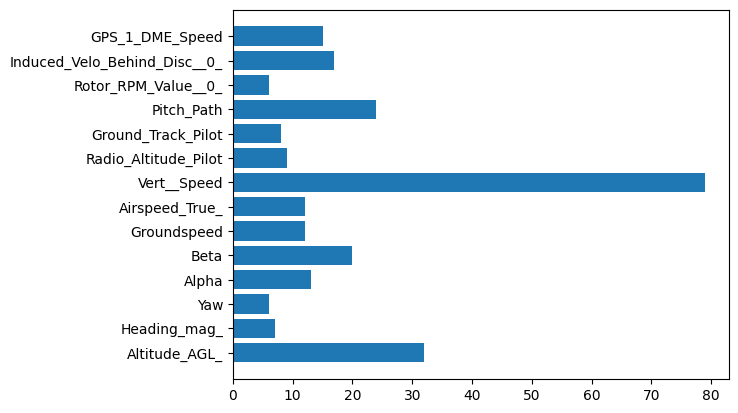

In [ ]:
import matplotlib.pyplot as plt
features_ = []
importances_ = []
for i in range(0, len(automl.model.estimator.feature_name_)):
  if automl.model.estimator.feature_importances_[i]>5:
    features_.append(automl.model.estimator.feature_name_[i])
    importances_.append(automl.model.estimator.feature_importances_[i])

plt.barh(features_, importances_)

In [ ]:
from flaml.automl.data import get_output_from_log

time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = get_output_from_log(filename="training_log", time_budget=120)

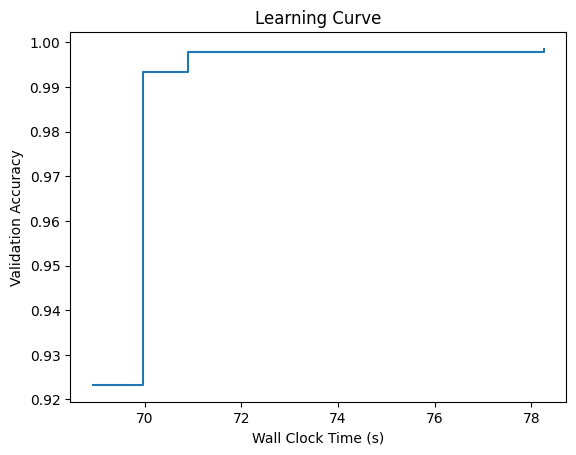

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [ ]:
best_model = automl.model
print(best_model)